# Tutorial 5
## Question 5

It is commonly accepted that an effectiveness factor of 99 % can be approximated as reaction rate controlled, while a Thiele modulus of 20 represents complete internal mass transfer control where the apparent rate is inverse proportional to the catalyst effective diameter.

It is further accepted that for a Thiele modulus bigger than 20, one can obtain the apparent rate constant at higher temperatures by extrapolating with a value half that of the activation energy, while for effectiveness factors bigger than 99% one can obtain the true rate constant at lower temperatures by extrapolating with the activation energy.

To approximate the area between internal mass transfer control and reaction rate control, the above extrapolations are sometimes performed in the reverse direction to obtain an intersection point (at a specific temperature) where the activation energy line on an Arhenius plot takes a sudden ‘bend’.

This approximation is not completely correct. We are interested in quantifying the error of this approximation for a first order reaction with the following properties.

\begin{array}{lrl}
\hline
\mathrm{Parameter} & \mathrm{Value} & \mathrm{Units}\\
\hline
D_e & 4\times 10^{-9} & \mathrm{m^2/s}\\
d_p & 2 & \mathrm{mm}\\
\rho_c & 2000 & \mathrm{kg/m^3}\\
E_{A,True} & 80000 & \mathrm{kJ/mol}\\
k_i'\ @\ (25\ ^\circ C) & 3\times 10^{-7} & \mathrm{m^3/kg/s}\\
\hline
\end{array}

---
### Part A
Plot the above description on an Arrhenius plot and show the region where the extrapolation is not entirely correct.

---
For the intrinsic rate constant, $k'_i(T)$, the Arhennius relation is,

\begin{align}
k_i'(T)=k_o'\exp\left(-\frac{E}{RT}\right)
\end{align}

The Thiele modulus is dependent on $k_i'$ and is thus a function of $T$,

$$
\phi_1^2=\frac{k'_i\rho_cR^2}{D_e}
$$

The rate law is dependent on $\eta$ which depends on $\phi_1$ and thus $T$,

$$
\eta=\frac{3}{\phi^2_1}\left(\phi_1\coth\phi_1-1\right)
$$

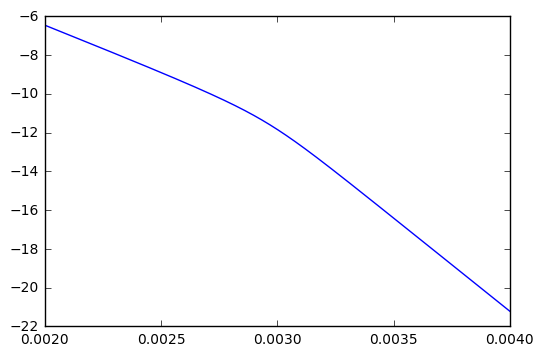

In [68]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import fsolve

def solve():
    def sol(ko):
        T25 = 298
        k = 3e-7
        ET = 8e4
        R = 8.314
        return k - ko*np.exp(-ET/R/T25)
    return fsolve(sol, 3e3)[0]
ko = solve()
    
def ki(T):
    ET = 8e4
    R = 8.314
    return ko*np.exp(-ET/R/T)

def phi2(T):
    De = 4e-9
    dp = 2e-3
    rhoc = 2000
    return ki(T)*rhoc*((dp/2)**2)/De

def eta(T):
    phi = np.sqrt(phi2(T))
    return 3/phi2(T) * (phi/np.tanh(phi) - 1)

def kapp(T):
    return ki(T)*eta(T)

T_1 = np.linspace(0.002, 0.004, 10000)
y = np.log(kapp(1/T_1))

plt.plot(T_1, y)

---
### Part B

What is the effectiveness factor at 25°C?

---
Determine $\phi_1$

\begin{align}
\phi^2_n&=\frac{k'_i\rho_cR^2C_{As}^{n-1}}{D_e}\\
\phi^2_1&=\frac{(3.0\times 10^{-4})(2000)(1.0\times 10^{-3})^2}{4.0\times 10^{-9}}\\
&=0.1500\\
\phi_1&=0.3873
\end{align}

Now calculate $\eta$

\begin{align}
\eta&=\frac{3}{\phi_1^2}\left(\phi_1\coth\phi_1-1\right)\\
&=\frac{3}{0.15}\left(0.3873\coth(0.3873)-1\right)\\
&=0.99
\end{align}

**This implies that we can assume reaction rate controlled. Additionally, we could obtain the rate constant at lower temperatures by extrapolating with the activation energy.**

---
### Part C
Above what temperature can one assume that complete internal mass transfer controls the reaction rate?

---

**We need to find $T$ where $\phi_1>20$**

First determine $\ln k_o$
\begin{align}
\ln(k_{20})&=\ln k_o-\frac{E_A}{RT}\\
\implies \ln k_o&=\ln(3.0\times 10^{-7})+\frac{80000}{8.314(298)}\\
&=17.270
\end{align}

Now determine relationship between $k_T$ and $\frac{1}{T}$,

\begin{align}
\ln k_T&=\ln k_o-\frac{E_A}{RT}\\
\implies \ln k_T&=17.270-9622.3\frac{1}{T}
\end{align}

Set $\phi=20$ and determine $k_T$

\begin{align}
\phi_1^2=20^2&=\frac{k'_T(2000)(1\times 10^{-3})^2}{4\times 10^{-9}}\\
\implies k'_T&=\frac{400(4\times 10^{-9})}{(2000)(1\times 10^{-3})^2}\\
\implies k'_T&=8.0\times 10^{-4}
\end{align}

Substitute and determine $T$

\begin{align}
\implies \ln k_T'&=17.270-9622.3\frac 1T\\
\implies T&=121.3\ ^\circ C\\
\end{align}

**Implies that above $120\ ^\circ C$, we can assume that the reaction rate is limited by the internal mass transfer rate**

---
### Part D
For the specific system, by how much is the rate constant over predicted/under predicted at the ‘intersection’ or ‘bend’ temperature if the sudden slope change method (discussed above) is used?